# ★ Least Squares ★

In [111]:
# Import modules
import sys
import math
import numpy as np
from matplotlib import pyplot as plt
from scipy import linalg
from scipy import sparse

# 4.1 Least Squares and the normal equations

$$
A^TA\bar{X} = A^Tb
$$

for the least squares solution $\bar{x}$ that minimizes the Euclidean length if the residual $r = b -Ax$

### Example 
Solve the least squares problem 
$$
\begin{bmatrix}
1 & -4 \\ 
2 & 3  \\ 
2 & 2
\end{bmatrix}
\begin{bmatrix}
x_1 \\ 
x_2
\end{bmatrix}
=
\begin{bmatrix}
-3 \\ 
15 \\
9
\end{bmatrix}
$$

In [10]:
A = np.array([1, -4, 2, 3, 2, 2]).reshape(3, 2)
b = np.array([-3, 15, 9])
x = linalg.lstsq(A, b)
print(x[0])

[ 3.8  1.8]


### Example
Find the line that best fits the three data points (t,y)=(1,2),(-1,1) and (1,3) <br/>
The model is $y = c_1 + c_2t$

In [3]:
A = np.array([1, 1, 1, -1, 1, 1]).reshape(3, 2)
b = np.array([2, 1, 3])
x = linalg.lstsq(A, b)
print(x[0])

[ 1.75  0.75]


The best line is $y = \frac{7}{4} + \frac{3}{4}t$ 

# 4.3 QR Factorization

In [81]:
def classical_gram_schmidt_orthogonalization(A):
    Q = np.zeros(A.size).reshape(A.shape)
    R = np.zeros(A.shape[1] ** 2).reshape(A.shape[1], A.shape[1])
    for j in range(A.shape[1]):
        y = A[:,j]
        for i in range(j):
            R[i][j] = np.matmul(Q[:,i], A[:,j])
            y = y - R[i][j] * Q[:,i]
        R[j][j] = linalg.norm(y, 2)
        Q[:,j] = y / R[j][j]
    return Q, R

### Example
Find the reduced QR factorization by applying Gram-Schmidt orthogonalization to the columns of 
$
A = 
\begin{bmatrix}
1 & -4 \\ 
2 & 3  \\ 
2 & 2
\end{bmatrix}
$

In [82]:
A = np.array([1, -4, 2, 3, 2, 2]).reshape(3, 2)
Q, R = classical_gram_schmidt_orthogonalization(A)
print('Q =')
print(Q)
print('R =')
print(R)

Q =
[[ 0.33333333 -0.93333333]
 [ 0.66666667  0.33333333]
 [ 0.66666667  0.13333333]]
R =
[[ 3.  2.]
 [ 0.  5.]]


### Example
Find the full QR factorization of 
$
A = 
\begin{bmatrix}
1 & -4 \\ 
2 & 3  \\ 
2 & 2
\end{bmatrix}
$

In [146]:
A = np.array([1, -4, 2, 3, 2, 2]).reshape(3, 2)
Q, R = linalg.qr(A)
print('Q =')
print(Q)
print('R =')
print(R)

Q =
[[-0.33333333  0.93333333 -0.13333333]
 [-0.66666667 -0.33333333 -0.66666667]
 [-0.66666667 -0.13333333  0.73333333]]
R =
[[-3. -2.]
 [ 0. -5.]
 [ 0.  0.]]


### Example 
Use the full QR factorization to solve the least squares problem
$$
\begin{bmatrix}
1 & -4 \\ 
2 & 3  \\ 
2 & 2
\end{bmatrix}
\begin{bmatrix}
x_1 \\ 
x_2
\end{bmatrix}
=
\begin{bmatrix}
-3 \\ 
15 \\
9
\end{bmatrix}
$$

In [204]:
A = np.array([1, -4, 2, 3, 2, 2]).reshape(3, 2)
b = np.array([-3, 15, 9]).T
Q, R = linalg.qr(A)
lu, piv = linalg.lu_factor(R[:2,:])
x = linalg.lu_solve([lu, piv], np.matmul(Q.T, b).reshape(3, 1)[:2])
print('x = %s' %x.T)

x = [[ 3.8  1.8]]


## Modified Gram-Schmidt orthogonalization

In [3]:
def modified_gram_schmidt_orthogonalization(A):
    Q = np.zeros(A.size).reshape(A.shape)
    R = np.zeros(A.shape[1] ** 2).reshape(A.shape[1], A.shape[1])
    for j in range(A.shape[1]):
        y = A[:,j]
        for i in range(j):
            R[i][j] = np.matmul(Q[:,i], y)
            y = y - R[i][j] * Q[:,i]
        R[j][j] = linalg.norm(y, 2)
        Q[:,j] = y / R[j][j]
    return Q, R

## Householder reflector

### Example

Let $x = [3,4]$ and $w =[5,0]$. Find a householder reflector H that satisfies $Hx = w$.

In [23]:
x = np.array([3, 4]).reshape(2, 1)
w = np.array([5, 0]).reshape(2, 1)
v = w - x

# Projection matrix
P = np.matmul(v, v.T) / np.matmul(v.T, v)

# Householder reflector
H = np.identity(P.shape[0]) - 2 * P

print('H=\n', H)

H=
 [[ 0.6  0.8]
 [ 0.8 -0.6]]


In [104]:
def householder_reflector(x):
    w = np.zeros(x.size)
    w[0] = linalg.norm(x, 2)
    v = (w - x).reshape(x.size, 1)
    
    # Projection matrix
    P = np.matmul(v, v.T) / np.matmul(v.T, v)
    
    # Householder reflector
    H = np.identity(P.shape[0]) - 2 * P
    
    return H

### Example 
Use Householder reflectors to find the QR factorization of 
$A = 
\begin{bmatrix}
3 & 1 \\
4 & 3 \\
\end{bmatrix}
$

In [106]:
A = np.array([3, 1, 4, 3]).reshape(2, 2)
H1 = householder_reflector(A[:,0])
R = np.matmul(H1, A)
Q = H1
print('Q=\n', Q)
print('R=\n', R)

Q=
 [[ 0.6  0.8]
 [ 0.8 -0.6]]
R=
 [[ 5.  3.]
 [ 0. -1.]]


### Example
Use Householder reflectors to find the QR factorization of
$A =
\begin{bmatrix}
1 & -4 \\
2 & 3  \\
2 & 2  \\
\end{bmatrix}
$

In [139]:
A = np.array([1, -4, 2, 3, 2, 2]).reshape(3, 2)
H1 = householder_reflector(A[:, 0])
TEMP = np.matmul(H1, A)
H2 = householder_reflector(TEMP[1:, 1])
H2_Ext = np.identity(H1.shape[0])
H2_Ext[-H2_TMP.shape[0]:, -H2_TMP.shape[1]:] = H2
R = np.matmul(np.matmul(H2_Ext, H1), A)
Q = np.matmul(H1, H2_Ext)
print('Q=\n', Q)
print('R=\n', R)

Q=
 [[ 0.33333333 -0.93333333 -0.13333333]
 [ 0.66666667  0.33333333 -0.66666667]
 [ 0.66666667  0.13333333  0.73333333]]
R=
 [[  3.00000000e+00   2.00000000e+00]
 [ -2.22044605e-16   5.00000000e+00]
 [  0.00000000e+00   0.00000000e+00]]


# 4.4 Generalized Minimum Residual (GMRES) Method

### Example
Solve $Ax = b$ for the following $A$ and $b = [1,0,0]^T$, using GMRES with $x_0 = [0,0,0]^T$

In [110]:
A = np.array([1, 1, 0, 0, 1, 0, 1, 1, 1]).reshape(3, 3)
b = np.array([1, 0, 0]).reshape(3, 1)
x0 = np.zeros(3).reshape(3, 1)
x, info = sparse.linalg.gmres(A, b, x0)
print('x = %s' %x)

x = [ 1.  0. -1.]


In [29]:
A = np.arange(1, 10).reshape(3, 3)
D = np.diag(A.diagonal())
print(D)
print(linalg.inv(D))

[[1 0 0]
 [0 5 0]
 [0 0 9]]
[[ 1.          0.         -0.        ]
 [ 0.          0.2        -0.        ]
 [ 0.          0.          0.11111111]]


# 4.5 Nonlinear Least Squares

## Gauss-Newton Method

### Example

Consider the three circles in the plane with centers $(x_1,y_1) = (-1,0)$,$(x_2,y_2) = (1,1/2)$,$(x_3,y_3) = (1,-1/2)$ <br/>
and radii $R_1 = 1,R_2 = 1/2,R3 = 1/2$,respectively. <br/>
Use the Gauss-Newton Method to find the point for which the sum of the squared distances to the three circles is miniminzed.

In [43]:
def R_xy(x, y):
    A = np.zeros(3)
    f = lambda xf, yf, R : math.sqrt(pow(x - xf, 2) + pow(y - yf, 2)) - R
    A[0] = f(-1,   0, 1)
    A[1] = f( 1, 0.5, 0.5)
    A[2] = f( 1,-0.5, 0.5)
    return A

def DR_xy(x, y):
    A = np.zeros(6).reshape(3, 2)
    fx = lambda xf, yf : (x - xf) / math.sqrt(pow(x - xf, 2) + pow(y - yf, 2))
    fy = lambda xf, yf : (y - yf) / math.sqrt(pow(x - xf, 2) + pow(y - yf, 2))
    A[0][0] = fx(-1, 0)
    A[0][1] = fy(-1, 0)
    A[1][0] = fx(1, 0.5)
    A[1][1] = fy(1, 0.5)
    A[2][0] = fx(1, -0.5)
    A[2][1] = fy(1, -0.5)
    return A

def gauss_newton_method(x0, y0, k):
    
    xk = np.array([x0, y0])
    
    for _ in range(k):
        x = xk[0]
        y = xk[1]
        A = DR_xy(x, y)
        r = R_xy(x, y)
        v = np.matmul(linalg.inv(np.matmul(A.T, A)), -np.matmul(A.T, r))
        xk = xk + v
        
    return xk

In [44]:
x = gauss_newton_method(0, 0, 8)
print('x = %s' %x)

x = [ 0.41289125  0.        ]


## Levenberg-Marquardt Method

### Example

Use Levenberg-Marquardt to fit the model $y = c_1e^{-c_2(t - c_3)^2}$ to the data points $(t_i,y_i) = {(1,3),(2,5),(2,7),(3,5),(4,1)}$

In [75]:
def R_xy(c):
    c1 = c[0]
    c2 = c[1]
    c3 = c[2]
    
    r = np.zeros(5)
    f = lambda t, y : c1 * math.exp( -c2 * pow(t - c3, 2) ) - y
    
    r[0] = f(1, 3)
    r[1] = f(2, 5)
    r[2] = f(2, 7)
    r[3] = f(3, 5)
    r[4] = f(4, 1)
    
    return r

def DR_xy(data, c):
    c1 = c[0]
    c2 = c[1]
    c3 = c[2]
    
    DR = np.zeros(15).reshape(5, 3)
    
    f0 = lambda t : math.exp( -c2 * pow(t - c3, 2) )
    f1 = lambda t : -c1 * pow(t - c3, 2) * math.exp( -c2 * pow(t - c3, 2) )
    f2 = lambda t : 2 * c1 * c2 * (t - c3) * math.exp( -c2 * pow(t - c3, 2) )
    
    for i in range(5):
        t = data[i][0]
        DR[i][0] = f0(t)
        DR[i][1] = f1(t)
        DR[i][2] = f2(t)
    
    return DR

def levenberg_marquardt_method(data, c, la, k):
    ck = c
    for _ in range(k):
        A = DR_xy(data, ck)
        r = R_xy(ck)
        mAr = -np.matmul(A.T, r)
        invA = np.linalg.inv(np.matmul(A.T, A) + la * np.diag(np.matmul(A.T, A).diagonal()))
        v = np.matmul(invA, mAr)
        ck = ck + v
    return ck

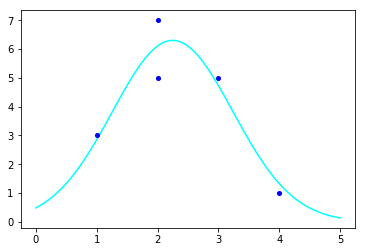

In [168]:
data = np.array([(1, 3), (2, 5), (2, 7), (3, 5), (4, 1)])
c = np.array([1, 1, 1])
c = levenberg_marquardt_method(data, c, 50, 1200)
f = lambda t, c1, c2, c3 : c1 * np.exp( -c2 * np.power(t - c3, 2) )
X = np.linspace(0, 5, 100)
Y = f(X, *c)

plt.plot(X, Y, color='cyan')
plt.plot(data[:,0], data[:,1], linestyle='', markersize=8, marker='.', color='blue')
plt.show()